<a href="https://colab.research.google.com/github/Luanseva/Proyecto/blob/main/Analisis_Cephaloscoema.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análisis de Datos de Cephaloscoema en la Universidad Nacional de Colombia**

El presente documeto, tiene como objetivo analizar los datos del tamaño de individuos de Cephaloscoema recolectados en 6 puntos de muestreo distintos en el campus de la Universidad Nacional de Colombia Sede de La Paz.

El conjunto de datos denominados Cephaloscoema consta de dos columnas principales (tamaño de los insectos) y Group (El grupo de los seis puntos al que se asigna el tamaño de los insectos)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. ***Cargar datos***

In [7]:
def cargar_datos_cephaloscoema():
    Cephaloscoema = pd.read_csv(r"/content/sample_data/Cephaloscoema.csv")
    return Cephaloscoema
Cephaloscoema = cargar_datos_cephaloscoema()
Cephaloscoema

,Genre,Group,Size
0,Cephaloscoema,G1,1.5
1,Cephaloscoema,G1,7.0
2,Cephaloscoema,G1,6.0
3,Cephaloscoema,G1,7.5
4,Cephaloscoema,G1,4.5
...,...,...,...
284,Cephaloscoema,G6,6.7
285,Cephaloscoema,G6,7.4
286,Cephaloscoema,G6,6.6
287,Cephaloscoema,G6,8.9


2. *Crear una copia con datos faltantes*

La función **crear_copia_con_na** tiene como propósito generar un nuevo dataframe basado en el original (Cephaloscoema), pero introduciendo valores NA (valores faltantes) de manera aleatoria en una de sus columnas (Size).

- Por otro lado, se establece una semilla aleatoria (123) usando **np.random.seed** para garantizar que los resultados sean reproducibles. Es decir, cada vez que se ejecute este código, se generarán los mismos índices aleatorios.

- Seguido, se crea una copia del dataframe Cephaloscoema y se guarda en una nueva variable llamada Cephaloscoema_na. Esto asegura que las modificaciones no afecten el dataframe original.

- Se define la cantidad de valores que se reemplazarán con NA. En este caso, 60 valores. **na_indie** selecciona 60 índices aleatorios (sin reemplazo, replace=False) de la columna de índices del dataframe Cephaloscoema_na. Estos índices indican las filas en las que se colocarán valores faltantes.

- En la columna Size del dataframe Cephaloscoema_na, los valores de las filas seleccionadas por na_indices se reemplazan con np.nan, que representa un valor faltante en pandas.

In [8]:
def crear_copia_con_na(Cephaloscoema):
    np.random.seed(123)  # Para reproducibilidad
    Cephaloscoema_na = Cephaloscoema.copy()  # Crear una copia del dataframe
    num_na = 60  # Número de valores a reemplazar con NA
    na_indices = np.random.choice(Cephaloscoema_na.index, num_na, replace=False)  # Obtener índices aleatorios
    Cephaloscoema_na.loc[na_indices, 'Size'] = np.nan  # Reemplazar los valores seleccionados con NA
    return Cephaloscoema_na
Cephaloscoema_with_na = crear_copia_con_na(Cephaloscoema)
Cephaloscoema_with_na

,Genre,Group,Size
0,Cephaloscoema,G1,1.5
1,Cephaloscoema,G1,7.0
2,Cephaloscoema,G1,6.0
3,Cephaloscoema,G1,7.5
4,Cephaloscoema,G1,4.5
...,...,...,...
284,Cephaloscoema,G6,6.7
285,Cephaloscoema,G6,NaN
286,Cephaloscoema,G6,6.6
287,Cephaloscoema,G6,8.9


3. *Guardar el data frame con valores NA aleatorios en un archivo Excel*

El propósito de este código es guardar un dataframe llamado Cephaloscoema_na en un archivo de Excel con el nombre Cephaloscoema_na.xlsx.

In [10]:
def guardar_dataframe_excel(Cephaloscoema_na):
    Cephaloscoema_na.to_excel("Cephaloscoema_na.xlsx", index=False)
print("DataFrame guardado en Cephaloscoema_na.xlsx")
guardar_dataframe_excel(Cephaloscoema_with_na)

DataFrame guardado en Cephaloscoema_na.xlsx


4. *Resumen estadístico del data frame, incluyendo el conteo de los datos NA*

El código define la función llamada obtener_resumen_estadistico que genera un resumen estadístico detallado de un dataframe dado, incluyendo el conteo de valores faltantes (NA) por columna.

El método .describe() genera un resumen estadístico del dataframe:

Para columnas numéricas:

- count: Número de valores no faltantes.
- mean: Media aritmética.
- std: Desviación estándar.
- min, 25%, 50%, 75%, max: Percentiles y valor mínimo/máximo.

Para columnas categóricas:

- count: Número de valores no faltantes.
- unique: Número de valores únicos.
- top: Valor más frecuente.
- freq: Frecuencia del valor más frecuente.
- El argumento include='all' asegura que se incluyan tanto columnas numéricas como categóricas en el resumen.

In [11]:
def obtener_resumen_estadistico(Cephaloscoema_na):
    resumen = Cephaloscoema_na.describe(include='all')
    resumen['na_count'] = Cephaloscoema_na.isna().sum()
    return resumen
    print(resumen)
obtener_resumen_estadistico(Cephaloscoema_with_na)

,Genre,Group,Size,na_count
count,289,289,229.000000,NaN
unique,1,6,NaN,NaN
top,Cephaloscoema,G4,NaN,NaN
freq,289,65,NaN,NaN
mean,NaN,NaN,6.723144,NaN
std,NaN,NaN,1.619681,NaN
min,NaN,NaN,1.500000,NaN
25%,NaN,NaN,6.400000,NaN
50%,NaN,NaN,7.000000,NaN
75%,NaN,NaN,7.300000,NaN


5. Media del Tamaño general (ignorando NA)



In [13]:
def calcular_media(Cephaloscoema_na):
    mean_vals = Cephaloscoema_na['Size'].mean()
    return mean_vals
    print(mean_vals)
calcular_media(Cephaloscoema_with_na)

6.723144104803494

6. *Media del Tamao por Grupo (ignorando NA)*

In [14]:
def calcular_media_por_grupo(Cephaloscoema_na):
    mean_vals = Cephaloscoema_na.groupby('Group')['Size'].mean()
    return mean_vals
    print(mean_vals)
calcular_media_por_grupo(Cephaloscoema_with_na)

,Size
Group,
G1,6.166667
G2,6.581579
G3,7.206250
G4,6.563043
G5,6.861538
G6,6.873529


7. *Mediana del tamaño por Grupo (ignorando NA)*

In [15]:
def calcular_mediana_por_grupo(Cephaloscoema_na):
    median_vals = Cephaloscoema_na.groupby('Group')['Size'].median()
    return median_vals
    print(median_vals)
calcular_mediana_por_grupo(Cephaloscoema_with_na)

,Size
Group,
G1,6.80
G2,7.10
G3,7.15
G4,6.80
G5,7.10
G6,7.00


8. *Varianza del tamaño por Grupo (ignorando NA)*

In [16]:
def calcular_varianza_por_grupo(Cephaloscoema_na):
    var_vals = Cephaloscoema_na.groupby('Group')['Size'].var()
    return var_vals
    print(var_vals)
calcular_varianza_por_grupo(Cephaloscoema_with_na)

,Size
Group,
G1,5.386154
G2,1.581543
G3,2.450282
G4,2.912604
G5,1.972609
G6,2.194127


9. *Desviación Estándar del tamaño por Grupo (ignorando NA)*

In [17]:
def calcular_desviacion_por_grupo(Cephaloscoema_na):
    sd_vals = Cephaloscoema_na.groupby('Group')['Size'].std()
    return sd_vals
    print(sd_vals)
calcular_desviacion_por_grupo(Cephaloscoema_with_na)

,Size
Group,
G1,2.320809
G2,1.257594
G3,1.565338
G4,1.706635
G5,1.404496
G6,1.481258


10. *Rango Intercuartil (IQR) del tamaño por Grupo (ignorando NA)*

In [18]:
def calcular_rango_intercuartil_por_grupo(Cephaloscoema_na):
    iqr_vals = Cephaloscoema_na.groupby('Group')['Size'].apply(lambda x: x.quantile(0.75) - x.quantile(0.25))
    return iqr_vals
    print(iqr_vals)
calcular_rango_intercuartil_por_grupo(Cephaloscoema_with_na)

,Size
Group,
G1,2.650
G2,0.600
G3,1.250
G4,1.100
G5,0.725
G6,0.600


11. *Percentil 90 del tamaño por Grupo (ignorando NA)*

In [20]:
def calcular_percentil_90_por_grupo(Cephaloscoema_na):
    perc_90_vals = Cephaloscoema_na.groupby('Group')['Size'].quantile(0.9)
    return perc_90_vals
    print(perc_90_vals)
calcular_percentil_90_por_grupo(Cephaloscoema_with_na)

,Size
Group,
G1,8.60
G2,7.30
G3,9.17
G4,8.05
G5,8.60
G6,8.33


12. *Histograma del tamaño por Grupo (ignorando NA) - Devuelve conteos de frecuencias por grupo*

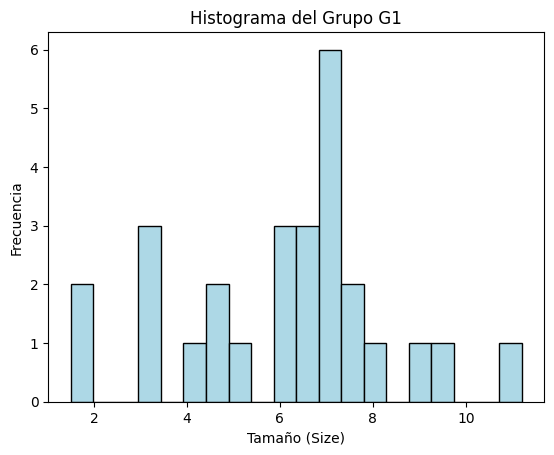

            Genre Group  Size
0   Cephaloscoema    G1   1.5
1   Cephaloscoema    G1   7.0
2   Cephaloscoema    G1   6.0
3   Cephaloscoema    G1   7.5
4   Cephaloscoema    G1   4.5
6   Cephaloscoema    G1   7.3
8   Cephaloscoema    G1  11.2
9   Cephaloscoema    G1   3.2
10  Cephaloscoema    G1   8.2
11  Cephaloscoema    G1   4.8
12  Cephaloscoema    G1   6.8
13  Cephaloscoema    G1   7.3
14  Cephaloscoema    G1   7.3
15  Cephaloscoema    G1   7.4
16  Cephaloscoema    G1   3.4
17  Cephaloscoema    G1   9.6
18  Cephaloscoema    G1   6.3
22  Cephaloscoema    G1   5.0
23  Cephaloscoema    G1   6.8
25  Cephaloscoema    G1   1.5
26  Cephaloscoema    G1   4.2
27  Cephaloscoema    G1   7.3
28  Cephaloscoema    G1   3.3
32  Cephaloscoema    G1   6.6
33  Cephaloscoema    G1   6.0
34  Cephaloscoema    G1   9.2
35  Cephaloscoema    G1   7.3


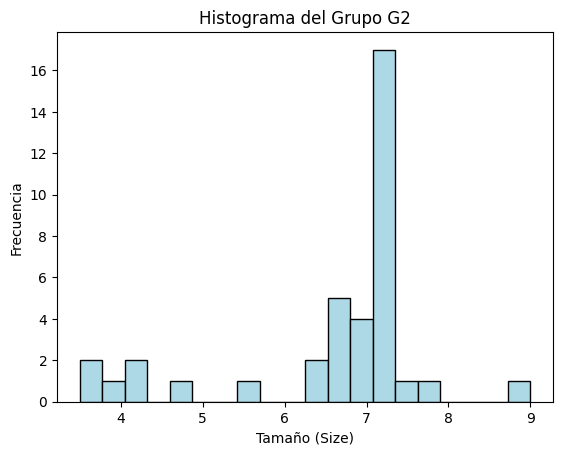

            Genre Group  Size
37  Cephaloscoema    G2   7.1
38  Cephaloscoema    G2   3.7
39  Cephaloscoema    G2   4.1
40  Cephaloscoema    G2   6.8
43  Cephaloscoema    G2   7.3
44  Cephaloscoema    G2   7.0
45  Cephaloscoema    G2   7.0
46  Cephaloscoema    G2   3.8
47  Cephaloscoema    G2   7.2
48  Cephaloscoema    G2   5.5
49  Cephaloscoema    G2   7.2
50  Cephaloscoema    G2   7.1
51  Cephaloscoema    G2   7.8
53  Cephaloscoema    G2   7.0
54  Cephaloscoema    G2   6.8
55  Cephaloscoema    G2   7.1
56  Cephaloscoema    G2   7.2
57  Cephaloscoema    G2   7.1
58  Cephaloscoema    G2   7.3
59  Cephaloscoema    G2   7.6
60  Cephaloscoema    G2   7.3
62  Cephaloscoema    G2   4.1
63  Cephaloscoema    G2   7.0
64  Cephaloscoema    G2   7.2
65  Cephaloscoema    G2   3.5
66  Cephaloscoema    G2   6.4
67  Cephaloscoema    G2   7.1
68  Cephaloscoema    G2   7.2
69  Cephaloscoema    G2   6.6
70  Cephaloscoema    G2   4.6
73  Cephaloscoema    G2   7.1
74  Cephaloscoema    G2   7.3
75  Cephal

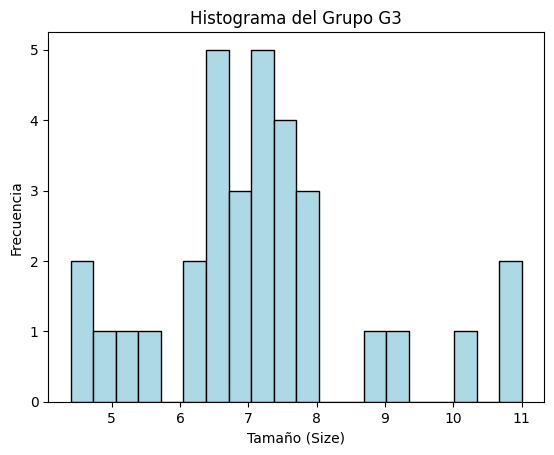

             Genre Group  Size
81   Cephaloscoema    G3   4.4
82   Cephaloscoema    G3  11.0
83   Cephaloscoema    G3   7.2
84   Cephaloscoema    G3   8.0
85   Cephaloscoema    G3   6.4
86   Cephaloscoema    G3   7.4
87   Cephaloscoema    G3   7.3
88   Cephaloscoema    G3   5.3
90   Cephaloscoema    G3   7.2
91   Cephaloscoema    G3   6.5
92   Cephaloscoema    G3   6.8
93   Cephaloscoema    G3  10.3
94   Cephaloscoema    G3   7.8
95   Cephaloscoema    G3   6.4
96   Cephaloscoema    G3   4.9
97   Cephaloscoema    G3   7.5
98   Cephaloscoema    G3   7.0
99   Cephaloscoema    G3   7.0
100  Cephaloscoema    G3   6.6
101  Cephaloscoema    G3   7.6
103  Cephaloscoema    G3   7.5
104  Cephaloscoema    G3  10.8
105  Cephaloscoema    G3   4.6
106  Cephaloscoema    G3   6.7
107  Cephaloscoema    G3   7.8
108  Cephaloscoema    G3   7.1
109  Cephaloscoema    G3   7.2
110  Cephaloscoema    G3   6.3
111  Cephaloscoema    G3   9.2
113  Cephaloscoema    G3   6.3
115  Cephaloscoema    G3   8.9
116  Cep

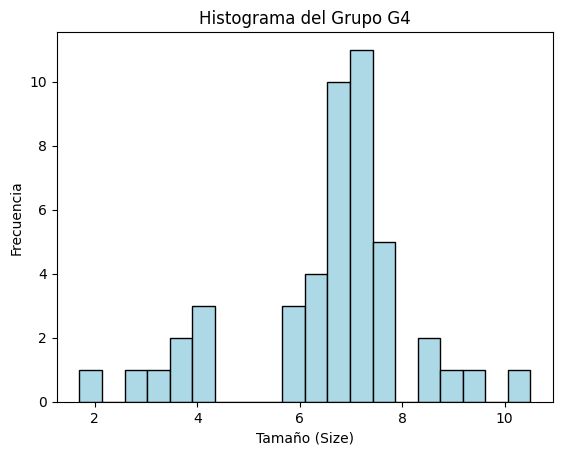

             Genre Group  Size
117  Cephaloscoema    G4   3.4
118  Cephaloscoema    G4   1.7
119  Cephaloscoema    G4   7.2
121  Cephaloscoema    G4   6.9
122  Cephaloscoema    G4   6.5
123  Cephaloscoema    G4   4.0
124  Cephaloscoema    G4   3.0
125  Cephaloscoema    G4   7.0
126  Cephaloscoema    G4   7.3
129  Cephaloscoema    G4   6.6
131  Cephaloscoema    G4   8.7
132  Cephaloscoema    G4   7.2
133  Cephaloscoema    G4   7.0
134  Cephaloscoema    G4  10.5
135  Cephaloscoema    G4   6.5
138  Cephaloscoema    G4   9.6
139  Cephaloscoema    G4   3.9
140  Cephaloscoema    G4   3.7
141  Cephaloscoema    G4   6.8
144  Cephaloscoema    G4   4.1
145  Cephaloscoema    G4   6.7
146  Cephaloscoema    G4   6.8
149  Cephaloscoema    G4   7.1
151  Cephaloscoema    G4   6.8
152  Cephaloscoema    G4   6.6
153  Cephaloscoema    G4   7.2
154  Cephaloscoema    G4   4.1
155  Cephaloscoema    G4   7.8
157  Cephaloscoema    G4   6.0
158  Cephaloscoema    G4   5.8
159  Cephaloscoema    G4   6.2
160  Cep

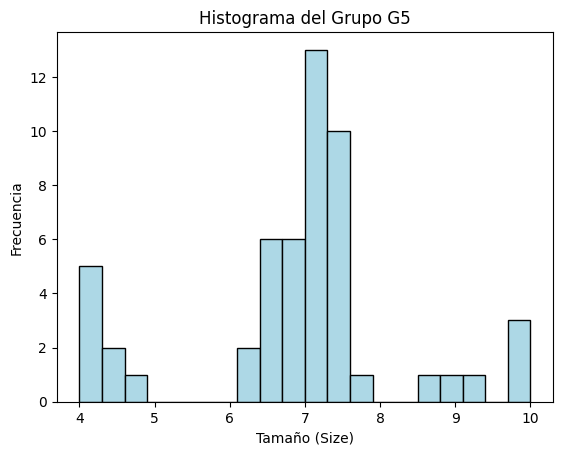

             Genre Group  Size
182  Cephaloscoema    G5   7.1
183  Cephaloscoema    G5   7.4
184  Cephaloscoema    G5   7.5
186  Cephaloscoema    G5   4.0
189  Cephaloscoema    G5   7.4
190  Cephaloscoema    G5   6.8
192  Cephaloscoema    G5   7.0
194  Cephaloscoema    G5   6.9
195  Cephaloscoema    G5   4.2
197  Cephaloscoema    G5   6.2
199  Cephaloscoema    G5   7.4
200  Cephaloscoema    G5   7.7
201  Cephaloscoema    G5   6.4
202  Cephaloscoema    G5   7.0
203  Cephaloscoema    G5  10.0
204  Cephaloscoema    G5   4.5
205  Cephaloscoema    G5   7.1
206  Cephaloscoema    G5   7.3
207  Cephaloscoema    G5   7.1
208  Cephaloscoema    G5   7.2
209  Cephaloscoema    G5   7.3
211  Cephaloscoema    G5   8.7
212  Cephaloscoema    G5   7.5
213  Cephaloscoema    G5   4.0
214  Cephaloscoema    G5   7.1
215  Cephaloscoema    G5   7.3
217  Cephaloscoema    G5   4.1
218  Cephaloscoema    G5   6.6
219  Cephaloscoema    G5   4.0
220  Cephaloscoema    G5   7.5
221  Cephaloscoema    G5   7.1
222  Cep

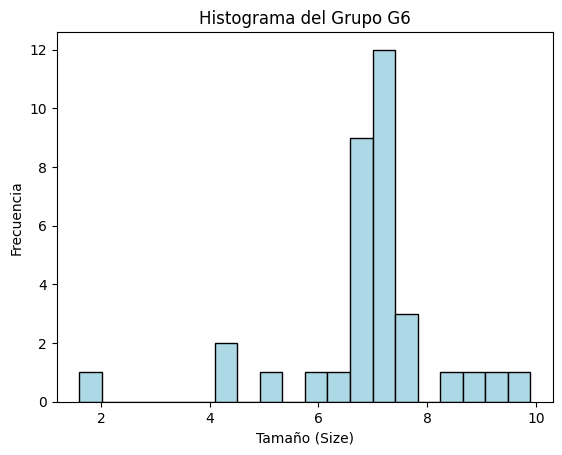

             Genre Group  Size
245  Cephaloscoema    G6   7.2
246  Cephaloscoema    G6   6.0
248  Cephaloscoema    G6   7.7
249  Cephaloscoema    G6   7.2
250  Cephaloscoema    G6   8.6
251  Cephaloscoema    G6   1.6
253  Cephaloscoema    G6   7.3
254  Cephaloscoema    G6   4.2
256  Cephaloscoema    G6   7.2
257  Cephaloscoema    G6   6.9
259  Cephaloscoema    G6   7.2
260  Cephaloscoema    G6   7.6
261  Cephaloscoema    G6   7.1
262  Cephaloscoema    G6   7.1
263  Cephaloscoema    G6   7.0
264  Cephaloscoema    G6   6.8
265  Cephaloscoema    G6   7.4
267  Cephaloscoema    G6   6.7
268  Cephaloscoema    G6   6.6
269  Cephaloscoema    G6   9.9
271  Cephaloscoema    G6   7.3
272  Cephaloscoema    G6   6.8
274  Cephaloscoema    G6   4.1
275  Cephaloscoema    G6   6.7
276  Cephaloscoema    G6   6.5
277  Cephaloscoema    G6   7.6
279  Cephaloscoema    G6   5.0
281  Cephaloscoema    G6   6.9
282  Cephaloscoema    G6   7.0
283  Cephaloscoema    G6   7.0
284  Cephaloscoema    G6   6.7
286  Cep

In [21]:
def crear_histograma_por_grupo(Cephaloscoema_na):
    grupos = Cephaloscoema_na['Group'].unique()
    for grupo in grupos:
        hist_data = Cephaloscoema_na[Cephaloscoema_na['Group'] == grupo].dropna(subset=['Size'])
        plt.hist(hist_data['Size'], bins=20, color='lightblue', edgecolor='black')
        plt.title(f"Histograma del Grupo {grupo}")
        plt.xlabel("Tamaño (Size)")
        plt.ylabel("Frecuencia")
        plt.show()
        print(hist_data)
crear_histograma_por_grupo(Cephaloscoema_with_na)

13. *Diagrama de Caja del tamaño por Grupo (ignorando NA) - Devuelve estadísticas del boxplot por grupo*

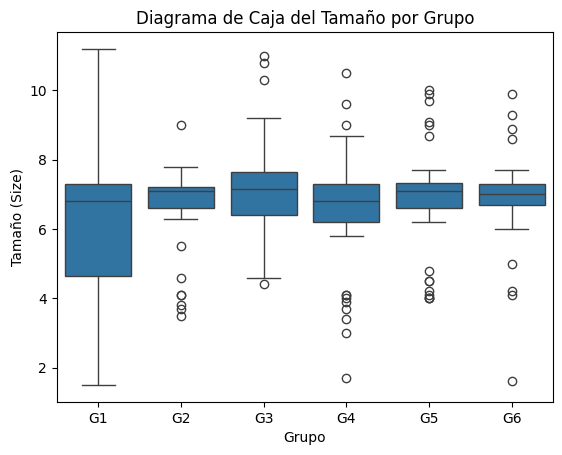

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
G1,27.0,6.166667,2.320809,1.5,4.65,6.80,7.300,11.2
G2,38.0,6.581579,1.257594,3.5,6.60,7.10,7.200,9.0
G3,32.0,7.206250,1.565338,4.4,6.40,7.15,7.650,11.0
G4,46.0,6.563043,1.706635,1.7,6.20,6.80,7.300,10.5
G5,52.0,6.861538,1.404496,4.0,6.60,7.10,7.325,10.0
G6,34.0,6.873529,1.481258,1.6,6.70,7.00,7.300,9.9


In [30]:
def crear_boxplot_por_grupo(Cephaloscoema_na):
    sns.boxplot(x='Group', y='Size', data=Cephaloscoema_na)
    plt.title("Diagrama de Caja del Tamaño por Grupo")
    plt.xlabel("Grupo")
    plt.ylabel("Tamaño (Size)")
    plt.show()
    stats = Cephaloscoema_na.groupby('Group')['Size'].describe()
    return stats
    print(stats)
crear_boxplot_por_grupo(Cephaloscoema_with_na)

14. *Diagrama de Dispersión de tamaño por Grupo (con ruido aleatorio, ignorar NA) - Devuelve número de puntos por grupo*

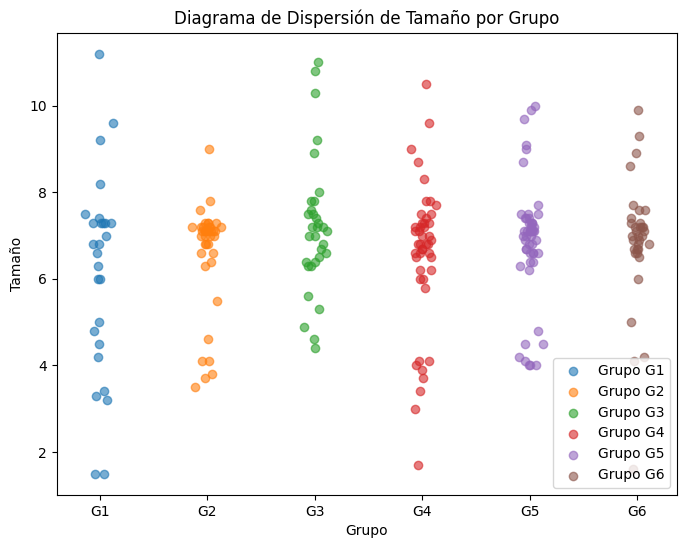

None


In [29]:
def crear_dispersion_por_grupo(Cephaloscoema_na):
    grupos = Cephaloscoema_na['Group'].unique()
    plt.figure(figsize=(8, 6))
    for i, grupo in enumerate(grupos):
        grupo_data = Cephaloscoema_na[Cephaloscoema_na['Group'] == grupo].dropna(subset=['Size'])
        y = grupo_data['Size']
        x = np.random.normal(i, 0.05, size=len(y))  # Añadir ruido
        plt.scatter(x, y, alpha=0.6, label=f"Grupo {grupo}")
    plt.xlabel("Grupo")
    plt.ylabel("Tamaño")
    plt.title("Diagrama de Dispersión de Tamaño por Grupo")
    plt.xticks(np.arange(len(grupos)), grupos)
    plt.legend()
    plt.show()
print(crear_dispersion_por_grupo(Cephaloscoema_with_na))

15. *Gráfico de Barras de la Media del tamaño por Grupo (ignorando NA) - Devuelve medias por grupo*

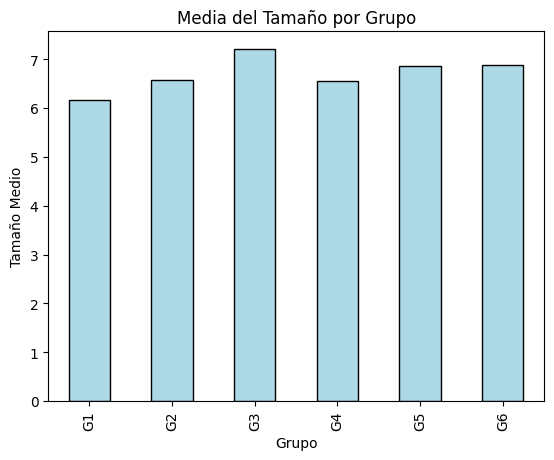

,Size
Group,
G1,6.166667
G2,6.581579
G3,7.206250
G4,6.563043
G5,6.861538
G6,6.873529


In [28]:
def crear_grafico_barras_por_grupo(Cephaloscoema_na):
    medias_por_grupo = Cephaloscoema_na.groupby('Group')['Size'].mean()
    medias_por_grupo.plot(kind='bar', color='lightblue', edgecolor='black')
    plt.title("Media del Tamaño por Grupo")
    plt.xlabel("Grupo")
    plt.ylabel("Tamaño Medio")
    plt.show()
    return medias_por_grupo
    print(medias_por_grupo)
crear_grafico_barras_por_grupo(Cephaloscoema_with_na)

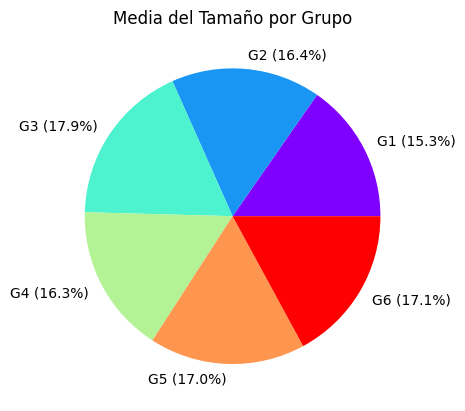

,Size
Group,
G1,6.166667
G2,6.581579
G3,7.206250
G4,6.563043
G5,6.861538
G6,6.873529


In [27]:
# 16. Gráfico de Torta de la Media del Tamaño por Grupo (ignorando NA)
def crear_diagrama_de_torta(Cephaloscoema_na):
    media_por_grupo = calcular_media_por_grupo(Cephaloscoema_na)
    porcentajes = (media_por_grupo / media_por_grupo.sum()) * 100
    labels = [f"{name} ({round(perc, 1)}%)" for name, perc in zip(media_por_grupo.index, porcentajes)]
    plt.pie(media_por_grupo, labels=labels, colors=plt.cm.rainbow(np.linspace(0, 1, len(media_por_grupo))))
    plt.title("Media del Tamaño por Grupo")
    plt.show()
    return media_por_grupo
    print(media_por_grupo)
crear_diagrama_de_torta(Cephaloscoema_with_na)